                                    Davor Ljubenkov 2019. Master Thesis MIT SCL - KTH

                                                https://dljubenk.github.io/blog/

# ---------------------------------------------------------------------------------------------------------------

    #STATIONS (2017) = 180             #BIKES (2017) = 1600              #RIDES (2017) = 5.3 MILLION

# ---------------------------------------------------------------------------------------------------------------

In [1]:
import os
import pandas as pd

import geopandas as gpd
from geopandas.tools import sjoin


import rtree

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

import folium
from folium.plugins import MarkerCluster

import shapely
from shapely.geometry import Point

import unicodedata

import pysal
from pysal.esda import mapclassify

import datetime as dt

import numpy as np
from numpy import array
from numpy import hstack

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer

# We'll be using the Tensorflow backend (default).
import tensorflow as tf

#import theano.tensor as T

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import keras
from keras import backend as K    #RNN LSTM NOT WORK WITHOUT THIS
from keras.models import load_model
from keras.models import model_from_json
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Dense
from keras.optimizers import Adam

import logging

import jgraph

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


import math
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import LSTM
from keras.layers.recurrent import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.callbacks import LambdaCallback

from __future__ import print_function

import random

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
Using TensorFlow backend.


# weather data "weather"

"weather" includes 2016, 2017, and first 3 months of 2018

In [2]:
weather = pd.read_csv("./weather.csv")
del weather['High Sea Level Press (in)']
del weather['Avg Sea Level Press (in)']
del weather['Low Sea Level Press (in)']
del weather['Avg Temp (F)']
del weather['Avg Dew Point (F)']
del weather['Avg Humidity (%)']
del weather['Avg Visibility (mi)']

weather2018 = weather[weather.Year == 2018]
weather2018 = weather2018[weather2018.Month != 4]
weather2018 = weather2018.reset_index(drop=True)
weather2018.head(weather2018.shape[0])

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 21, "High Temp (F)": 39, "Low Temp (F)": 32, "High Dew Point (F)": 28, "Low Dew Point (F)": 22, "High Humidity (%)": 78, "Low Humidity (%)": 61, "High Visibility (mi)": 10, "Low Visibility (mi)": 10, "High Wind (mph)": 25, "Avg Wind (mph)": 8, "High Wind Gust (mph)": 28, "Snowfall (in)": 0.00, "Precip (in)": 0.00, "Events": None}, index=[78])
df2 = pd.concat([df.ix[:78], line, df.ix[79:]]).reset_index(drop=True)

weather2018 = df2

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 22, "High Temp (F)": 42, "Low Temp (F)": 32, "High Dew Point (F)": 35, "Low Dew Point (F)": 34, "High Humidity (%)": 96, "Low Humidity (%)": 73, "High Visibility (mi)": 10, "Low Visibility (mi)": 1, "High Wind (mph)": 30, "Avg Wind (mph)": 5, "High Wind Gust (mph)": 32, "Snowfall (in)": 0.09, "Precip (in)": 0.09, "Events": 'Both'}, index=[79])
df2 = pd.concat([df.ix[:79], line, df.ix[80:]]).reset_index(drop=True)

weather2018 = df2

weather2017 = weather[weather.Year == 2017]
weather2017 = weather2017.reset_index(drop=True)

weather2016 = weather[weather.Year == 2016]
weather2016 = weather2016.reset_index(drop=True)

weather1617 = weather2016.append(weather2017)
weather1617 = weather1617.reset_index(drop=True)
weather161718 = weather1617.append(weather2018)
weather161718 = weather161718.reset_index(drop=True)


#weather161718.head(weather161718.shape[0])

weather = weather161718

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# bike data "bikes"

DESCRIPTION OF THINGS CLEANED:

removing long trips

we lost 1481 trips (1767759 - 1766278) in 2018. that were longer than 24 hours (86400 seconds)
for example, one trip was even 53 days long, investigate maybe this super long trips?

# 2016

In [3]:
dataset201601 = pd.read_csv("./2016/201601.csv")
dataset201601 = dataset201601[dataset201601['tripduration'] < 86400]
dataset201601 = dataset201601[['starttime','stoptime']]
dataset201601['starttime'] = dataset201601['starttime'].str[:10]
dataset201601['stoptime'] = dataset201601['stoptime'].str[:10]
dataset201601['freq'] = dataset201601.groupby('starttime')['starttime'].transform('count')
dataset201601 = dataset201601.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201601 = dataset201601.reset_index(drop=True)
del dataset201601['stoptime']
#dataset201601.insert( 0,'index', 1)

dataset201602 = pd.read_csv("./2016/201602.csv")
dataset201602 = dataset201602[dataset201602['tripduration'] < 86400]
dataset201602 = dataset201602[['starttime','stoptime']]
dataset201602['starttime'] = dataset201602['starttime'].str[:10]
dataset201602['stoptime'] = dataset201602['stoptime'].str[:10]
dataset201602['freq'] = dataset201602.groupby('starttime')['starttime'].transform('count')
dataset201602 = dataset201602.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201602 = dataset201602.reset_index(drop=True)
del dataset201602['stoptime']
#dataset201602.insert( 0,'index', 1)

dataset201603 = pd.read_csv("./2016/201603.csv")
dataset201603 = dataset201603[dataset201603['tripduration'] < 86400]
dataset201603 = dataset201603[['starttime','stoptime']]
dataset201603['starttime'] = dataset201603['starttime'].str[:10]
dataset201603['stoptime'] = dataset201603['stoptime'].str[:10]
dataset201603['freq'] = dataset201603.groupby('starttime')['starttime'].transform('count')
dataset201603 = dataset201603.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201603 = dataset201603.reset_index(drop=True)
del dataset201603['stoptime']
#dataset201603.insert( 0,'index', 1)

dataset201604 = pd.read_csv("./2016/201604.csv")
dataset201604 = dataset201604[dataset201604['tripduration'] < 86400]
dataset201604 = dataset201604[['starttime','stoptime']]
dataset201604['starttime'] = dataset201604['starttime'].str[:10]
dataset201604['stoptime'] = dataset201604['stoptime'].str[:10]
dataset201604['freq'] = dataset201604.groupby('starttime')['starttime'].transform('count')
dataset201604 = dataset201604.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201604 = dataset201604.reset_index(drop=True)
del dataset201604['stoptime']
#dataset201604.insert( 0,'index', 1)

dataset201605 = pd.read_csv("./2016/201605.csv")
dataset201605 = dataset201605[dataset201605['tripduration'] < 86400]
dataset201605 = dataset201605[['starttime','stoptime']]
dataset201605['starttime'] = dataset201605['starttime'].str[:10]
dataset201605['stoptime'] = dataset201605['stoptime'].str[:10]
dataset201605['freq'] = dataset201605.groupby('starttime')['starttime'].transform('count')
dataset201605 = dataset201605.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201605 = dataset201605.reset_index(drop=True)
del dataset201605['stoptime']
#dataset201605.insert( 0,'index', 1)

dataset201606 = pd.read_csv("./2016/201606.csv")
dataset201606 = dataset201606[dataset201606['tripduration'] < 86400]
dataset201606 = dataset201606[['starttime','stoptime']]
dataset201606['starttime'] = dataset201606['starttime'].str[:10]
dataset201606['stoptime'] = dataset201606['stoptime'].str[:10]
dataset201606['freq'] = dataset201606.groupby('starttime')['starttime'].transform('count')
dataset201606 = dataset201606.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201606 = dataset201606.reset_index(drop=True)
del dataset201606['stoptime']
#dataset201606.insert( 0,'index', 1)

dataset201607 = pd.read_csv("./2016/201607.csv")
dataset201607 = dataset201607[dataset201607['tripduration'] < 86400]
dataset201607 = dataset201607[['starttime','stoptime']]
dataset201607['starttime'] = dataset201607['starttime'].str[:10]
dataset201607['stoptime'] = dataset201607['stoptime'].str[:10]
dataset201607['freq'] = dataset201607.groupby('starttime')['starttime'].transform('count')
dataset201607 = dataset201607.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201607 = dataset201607.reset_index(drop=True)
del dataset201607['stoptime']
#dataset201607.insert( 0,'index', 1)

dataset201608 = pd.read_csv("./2016/201608.csv")
dataset201608 = dataset201608[dataset201608['tripduration'] < 86400]
dataset201608 = dataset201608[['starttime','stoptime']]
dataset201608['starttime'] = dataset201608['starttime'].str[:10]
dataset201608['stoptime'] = dataset201608['stoptime'].str[:10]
dataset201608['freq'] = dataset201608.groupby('starttime')['starttime'].transform('count')
dataset201608 = dataset201608.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201608 = dataset201608.reset_index(drop=True)
del dataset201608['stoptime']
#dataset201608.insert( 0,'index', 1)

dataset201609 = pd.read_csv("./2016/201609.csv")
dataset201609 = dataset201609[dataset201609['tripduration'] < 86400]
dataset201609 = dataset201609[['starttime','stoptime']]
dataset201609['starttime'] = dataset201609['starttime'].str[:10]
dataset201609['stoptime'] = dataset201609['stoptime'].str[:10]
dataset201609['freq'] = dataset201609.groupby('starttime')['starttime'].transform('count')
dataset201609 = dataset201609.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201609 = dataset201609.reset_index(drop=True)
del dataset201609['stoptime']
#dataset201609.insert( 0,'index', 1)

dataset201610 = pd.read_csv("./2016/201610.csv")
dataset201610 = dataset201610[dataset201610['tripduration'] < 86400]
dataset201610 = dataset201610[['starttime','stoptime']]
dataset201610['starttime'] = dataset201610['starttime'].str[:10]
dataset201610['stoptime'] = dataset201610['stoptime'].str[:10]
dataset201610['freq'] = dataset201610.groupby('starttime')['starttime'].transform('count')
dataset201610 = dataset201610.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201610 = dataset201610.reset_index(drop=True)
del dataset201610['stoptime']
#dataset201610.insert( 0,'index', 1)

dataset201611 = pd.read_csv("./2016/201611.csv")
dataset201611 = dataset201611[dataset201611['tripduration'] < 86400]
dataset201611 = dataset201611[['starttime','stoptime']]
dataset201611['starttime'] = dataset201611['starttime'].str[:10]
dataset201611['stoptime'] = dataset201611['stoptime'].str[:10]
dataset201611['freq'] = dataset201611.groupby('starttime')['starttime'].transform('count')
dataset201611 = dataset201611.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201611 = dataset201611.reset_index(drop=True)
del dataset201611['stoptime']
#dataset201611.insert( 0,'index', 1)

dataset201612 = pd.read_csv("./2016/201612.csv")
dataset201612 = dataset201612[dataset201612['tripduration'] < 86400]
dataset201612 = dataset201612[['starttime','stoptime']]
dataset201612['starttime'] = dataset201612['starttime'].str[:10]
dataset201612['stoptime'] = dataset201612['stoptime'].str[:10]
dataset201612['freq'] = dataset201612.groupby('starttime')['starttime'].transform('count')
dataset201612 = dataset201612.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201612 = dataset201612.reset_index(drop=True)
del dataset201612['stoptime']
#dataset201612.insert( 0,'index', 1)

# 2017

In [4]:
dataset201701 = pd.read_csv("./2017/201701.csv")
dataset201701 = dataset201701[dataset201701['tripduration'] < 86400]
dataset201701 = dataset201701[['starttime','stoptime']]
dataset201701['starttime'] = dataset201701['starttime'].str[:10]
dataset201701['stoptime'] = dataset201701['stoptime'].str[:10]
dataset201701['freq'] = dataset201701.groupby('starttime')['starttime'].transform('count')
dataset201701 = dataset201701.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201701 = dataset201701.reset_index(drop=True)
del dataset201701['stoptime']
#dataset201701.insert( 0,'index', 1)

dataset201702 = pd.read_csv("./2017/201702.csv")
dataset201702 = dataset201702[dataset201702['tripduration'] < 86400]
dataset201702 = dataset201702[['starttime','stoptime']]
dataset201702['starttime'] = dataset201702['starttime'].str[:10]
dataset201702['stoptime'] = dataset201702['stoptime'].str[:10]
dataset201702['freq'] = dataset201702.groupby('starttime')['starttime'].transform('count')
dataset201702 = dataset201702.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201702 = dataset201702.reset_index(drop=True)
del dataset201702['stoptime']
#dataset201702.insert( 0,'index', 1)

dataset201703 = pd.read_csv("./2017/201703.csv")
dataset201703 = dataset201703[dataset201703['tripduration'] < 86400]
dataset201703 = dataset201703[['starttime','stoptime']]
dataset201703['starttime'] = dataset201703['starttime'].str[:10]
dataset201703['stoptime'] = dataset201703['stoptime'].str[:10]
dataset201703['freq'] = dataset201703.groupby('starttime')['starttime'].transform('count')
dataset201703 = dataset201703.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201703 = dataset201703.reset_index(drop=True)
del dataset201703['stoptime']
#dataset201703.insert( 0,'index', 1)

dataset201704 = pd.read_csv("./2017/201704.csv")
dataset201704 = dataset201704[dataset201704['tripduration'] < 86400]
dataset201704 = dataset201704[['starttime','stoptime']]
dataset201704['starttime'] = dataset201704['starttime'].str[:10]
dataset201704['stoptime'] = dataset201704['stoptime'].str[:10]
dataset201704['freq'] = dataset201704.groupby('starttime')['starttime'].transform('count')
dataset201704 = dataset201704.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201704 = dataset201704.reset_index(drop=True)
del dataset201704['stoptime']
#dataset201704.insert( 0,'index', 1)

dataset201705 = pd.read_csv("./2017/201705.csv")
dataset201705 = dataset201705[dataset201705['tripduration'] < 86400]
dataset201705 = dataset201705[['starttime','stoptime']]
dataset201705['starttime'] = dataset201705['starttime'].str[:10]
dataset201705['stoptime'] = dataset201705['stoptime'].str[:10]
dataset201705['freq'] = dataset201705.groupby('starttime')['starttime'].transform('count')
dataset201705 = dataset201705.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201705 = dataset201705.reset_index(drop=True)
del dataset201705['stoptime']
#dataset201705.insert( 0,'index', 1)

dataset201706 = pd.read_csv("./2017/201706.csv")
dataset201706 = dataset201706[dataset201706['tripduration'] < 86400]
dataset201706 = dataset201706[['starttime','stoptime']]
dataset201706['starttime'] = dataset201706['starttime'].str[:10]
dataset201706['stoptime'] = dataset201706['stoptime'].str[:10]
dataset201706['freq'] = dataset201706.groupby('starttime')['starttime'].transform('count')
dataset201706 = dataset201706.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201706 = dataset201706.reset_index(drop=True)
del dataset201706['stoptime']
#dataset201706.insert( 0,'index', 1)

dataset201707 = pd.read_csv("./2017/201707.csv")
dataset201707 = dataset201707[dataset201707['tripduration'] < 86400]
dataset201707 = dataset201707[['starttime','stoptime']]
dataset201707['starttime'] = dataset201707['starttime'].str[:10]
dataset201707['stoptime'] = dataset201707['stoptime'].str[:10]
dataset201707['freq'] = dataset201707.groupby('starttime')['starttime'].transform('count')
dataset201707 = dataset201707.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201707 = dataset201707.reset_index(drop=True)
del dataset201707['stoptime']
#dataset201707.insert( 0,'index', 1)

dataset201708 = pd.read_csv("./2017/201708.csv")
dataset201708 = dataset201708[dataset201708['tripduration'] < 86400]
dataset201708 = dataset201708[['starttime','stoptime']]
dataset201708['starttime'] = dataset201708['starttime'].str[:10]
dataset201708['stoptime'] = dataset201708['stoptime'].str[:10]
dataset201708['freq'] = dataset201708.groupby('starttime')['starttime'].transform('count')
dataset201708 = dataset201708.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201708 = dataset201708.reset_index(drop=True)
del dataset201708['stoptime']
#dataset201708.insert( 0,'index', 1)

dataset201709 = pd.read_csv("./2017/201709.csv")
dataset201709 = dataset201709[dataset201709['tripduration'] < 86400]
dataset201709 = dataset201709[['starttime','stoptime']]
dataset201709['starttime'] = dataset201709['starttime'].str[:10]
dataset201709['stoptime'] = dataset201709['stoptime'].str[:10]
dataset201709['freq'] = dataset201709.groupby('starttime')['starttime'].transform('count')
dataset201709 = dataset201709.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201709 = dataset201709.reset_index(drop=True)
del dataset201709['stoptime']
#dataset201709.insert( 0,'index', 1)

dataset201710 = pd.read_csv("./2017/201710.csv")
dataset201710 = dataset201710[dataset201710['tripduration'] < 86400]
dataset201710 = dataset201710[['starttime','stoptime']]
dataset201710['starttime'] = dataset201710['starttime'].str[:10]
dataset201710['stoptime'] = dataset201710['stoptime'].str[:10]
dataset201710['freq'] = dataset201710.groupby('starttime')['starttime'].transform('count')
dataset201710 = dataset201710.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201710 = dataset201710.reset_index(drop=True)
del dataset201710['stoptime']
#dataset201710.insert( 0,'index', 1)

dataset201711= pd.read_csv("./2017/201711.csv")
dataset201711 = dataset201711[dataset201711['tripduration'] < 86400]
dataset201711 = dataset201711[['starttime','stoptime']]
dataset201711['starttime'] = dataset201711['starttime'].str[:10]
dataset201711['stoptime'] = dataset201711['stoptime'].str[:10]
dataset201711['freq'] = dataset201711.groupby('starttime')['starttime'].transform('count')
dataset201711 = dataset201711.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201711 = dataset201711.reset_index(drop=True)
del dataset201711['stoptime']
#dataset201711.insert( 0,'index', 1)

dataset201712= pd.read_csv("./2017/201712.csv")
dataset201712 = dataset201712[dataset201712['tripduration'] < 86400]
dataset201712 = dataset201712[['starttime','stoptime']]
dataset201712['starttime'] = dataset201712['starttime'].str[:10]
dataset201712['stoptime'] = dataset201712['stoptime'].str[:10]
dataset201712['freq'] = dataset201712.groupby('starttime')['starttime'].transform('count')
dataset201712 = dataset201712.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201712 = dataset201712.reset_index(drop=True)
del dataset201712['stoptime']
#dataset201712.insert( 0,'index', 1)

# 01.2018 + 02.2018 + 03.2018

In [5]:
dataset201801 = pd.read_csv("./2018/201801.csv")
dataset201801 = dataset201801[dataset201801['tripduration'] < 86400]
dataset201801 = dataset201801[['starttime','stoptime']]
dataset201801['starttime'] = dataset201801['starttime'].str[:10]
dataset201801['stoptime'] = dataset201801['stoptime'].str[:10]
dataset201801['freq'] = dataset201801.groupby('starttime')['starttime'].transform('count')
dataset201801 = dataset201801.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201801 = dataset201801.reset_index(drop=True)
del dataset201801['stoptime']
#dataset201801.insert( 0,'index', 1)

dataset201802 = pd.read_csv("./2018/201802.csv")
dataset201802 = dataset201802[dataset201802['tripduration'] < 86400]
dataset201802 = dataset201802[['starttime','stoptime']]
dataset201802['starttime'] = dataset201802['starttime'].str[:10]
dataset201802['stoptime'] = dataset201802['stoptime'].str[:10]
dataset201802['freq'] = dataset201802.groupby('starttime')['starttime'].transform('count')
dataset201802 = dataset201802.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201802 = dataset201802.reset_index(drop=True)
del dataset201802['stoptime']
#dataset201802.insert( 0,'index', 1)

dataset201803 = pd.read_csv("./2018/201803.csv")
dataset201803 = dataset201803[dataset201803['tripduration'] < 86400]
dataset201803 = dataset201803[['starttime','stoptime']]
dataset201803['starttime'] = dataset201803['starttime'].str[:10]
dataset201803['stoptime'] = dataset201803['stoptime'].str[:10]
dataset201803['freq'] = dataset201803.groupby('starttime')['starttime'].transform('count')
dataset201803 = dataset201803.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201803 = dataset201803.reset_index(drop=True)
del dataset201803['stoptime']
#dataset201803.insert( 0,'index', 1)

df = pd.DataFrame(dataset201803)

line = pd.DataFrame({ "starttime": '2018-03-13', "freq":0}, index=[11])
df2 = pd.concat([df.ix[:11], line, df.ix[12:]]).reset_index(drop=True)

dataset201803 = df2

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


DESCRIPTION OF THINGS CLEANED:

dealing with anomalies in bike frequencies due to extreme weather by replacing the values with the frequency mean for that specific month

In [6]:
frames = [dataset201601, dataset201602, dataset201603, dataset201604, dataset201605, dataset201606, dataset201607, dataset201608, dataset201609, dataset201610, dataset201611, dataset201612, dataset201701, dataset201702, dataset201703, dataset201704, dataset201705, dataset201706, dataset201707, dataset201708, dataset201709, dataset201710, dataset201711, dataset201712, dataset201801, dataset201802, dataset201803]

bikes = pd.concat(frames)

bikes = bikes.reset_index(drop=True)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


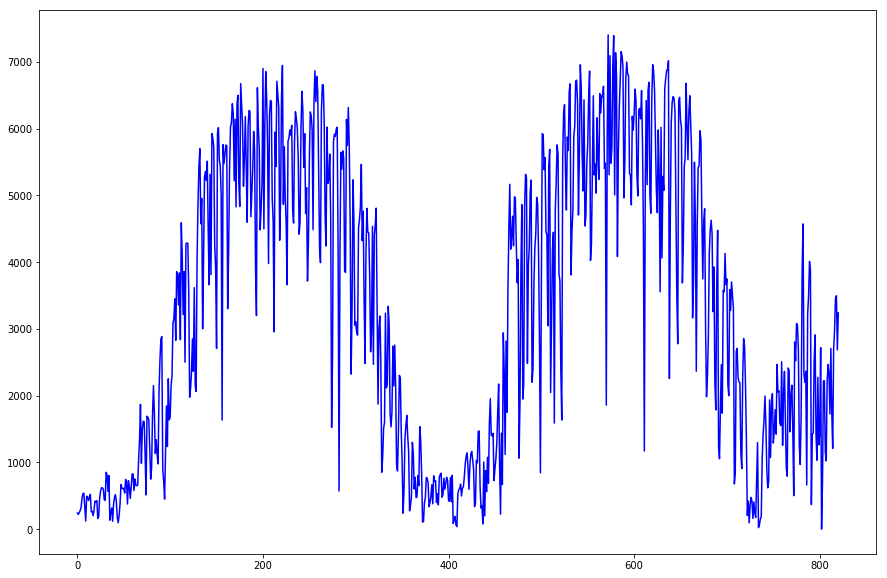

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(bikes['freq']).reshape(len(bikes['freq']), 1))
series = pd.DataFrame(scaled)
series.columns = ['freqscaled']
bikes = pd.merge(bikes, series, left_index=True, right_index=True)


bikes.to_csv('C:/Users/Davor/Desktop/Notebooks/bikes.csv')

plt.figure(figsize=(15,10))
plt.plot(bikes['freq'], color='blue')
plt.show()

In [8]:
bikes.head()

,starttime,freq,freqscaled
0,2016-01-01,241,0.032546
1,2016-01-02,220,0.029710
2,2016-01-03,245,0.033086
3,2016-01-04,276,0.037272
4,2016-01-05,325,0.043889


In [9]:
df = pd.DataFrame(bikes)
df.shape

(821, 3)

# anomalies

In [10]:
mean201606 = dataset201606['freq'].mean()
mean201607 = dataset201607['freq'].mean()
mean201608 = dataset201608['freq'].mean()
mean201609 = dataset201609['freq'].mean()
mean201610 = dataset201610['freq'].mean()
mean201704 = dataset201704['freq'].mean()
mean201705 = dataset201705['freq'].mean()
mean201706 = dataset201706['freq'].mean()
mean201707 = dataset201707['freq'].mean()
mean201708 = dataset201708['freq'].mean()
mean201709 = dataset201709['freq'].mean()
mean201710 = dataset201710['freq'].mean()
mean201711 = dataset201711['freq'].mean()
mean201802 = dataset201802['freq'].mean()
mean201803 = dataset201803['freq'].mean()

In [11]:
dataset201606['freq'][4] = mean201606
dataset201606['freq'][10] = mean201606
dataset201607['freq'][11] = mean201607
dataset201607['freq'][30] = mean201607
dataset201608['freq'][13] = mean201608
dataset201609['freq'][4] = mean201609
dataset201610['freq'][1] = mean201610
dataset201610['freq'][8] = mean201610
dataset201610['freq'][21] = mean201610
dataset201610['freq'][0] = mean201610
dataset201704['freq'][20] = mean201704
dataset201704['freq'][21] = mean201704
dataset201704['freq'][24] = mean201704
dataset201704['freq'][25] = mean201704
dataset201704['freq'][29] = mean201704
dataset201705['freq'][12] = mean201705
dataset201705['freq'][13] = mean201705
dataset201705['freq'][4] = mean201705
dataset201705['freq'][5] = mean201705
dataset201705['freq'][24] = mean201705
dataset201705['freq'][28] = mean201705
dataset201706['freq'][4] = mean201706
dataset201706['freq'][5] = mean201706
dataset201707['freq'][23] = mean201707
dataset201708['freq'][4] = mean201708
dataset201708['freq'][19] = mean201708
dataset201709['freq'][2] = mean201709
dataset201709['freq'][29] = mean201709
dataset201710['freq'][8] = mean201710
dataset201710['freq'][28] = mean201710
dataset201711['freq'][8] = mean201711
dataset201711['freq'][22] = mean201711
dataset201802['freq'][10] = mean201802
dataset201802['freq'][24] = mean201802
dataset201803['freq'][1] = mean201803
dataset201803['freq'][12] = mean201803

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying

# 2016 + 2017 + 2018.123

we get data with 821 rows and 2 columns

In [12]:
frames = [dataset201601, dataset201602, dataset201603, dataset201604, dataset201605, dataset201606, dataset201607, dataset201608, dataset201609, dataset201610, dataset201611, dataset201612, dataset201701, dataset201702, dataset201703, dataset201704, dataset201705, dataset201706, dataset201707, dataset201708, dataset201709, dataset201710, dataset201711, dataset201712, dataset201801, dataset201802, dataset201803]

bikes = pd.concat(frames)

bikes = bikes.reset_index(drop=True)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


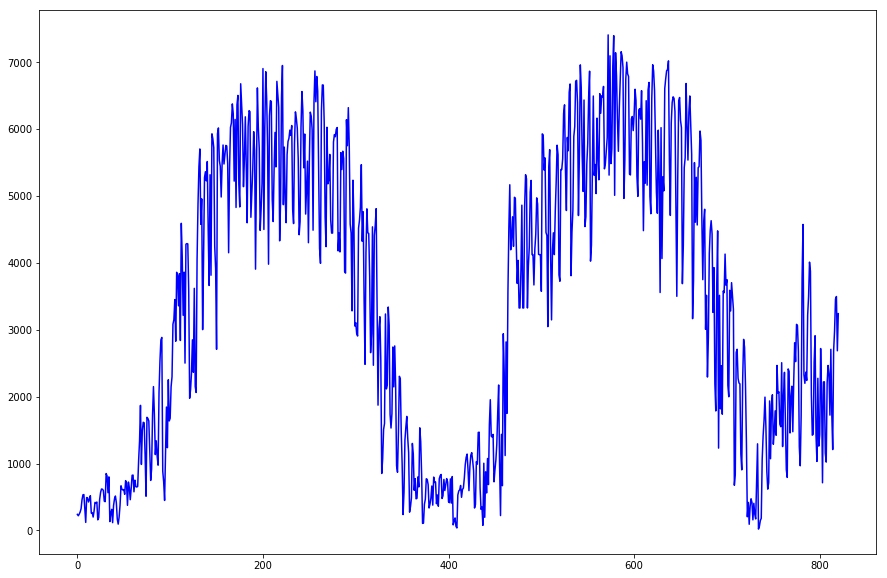

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(bikes['freq']).reshape(len(bikes['freq']), 1))
series = pd.DataFrame(scaled)
series.columns = ['freqscaled']
bikes = pd.merge(bikes, series, left_index=True, right_index=True)


bikes.to_csv('C:/Users/Davor/Desktop/Notebooks/bikes.csv')

plt.figure(figsize=(15,10))
plt.plot(bikes['freq'], color='blue')
plt.show()

In [14]:
#TESTIIIIIIIIIIIIIIIIIIIING


dataset201706



,starttime,freq
0,2017-06-01,5757
1,2017-06-02,5613
2,2017-06-03,3819
3,2017-06-04,3724
4,2017-06-05,5393
5,2017-06-06,5393
6,2017-06-07,5553
7,2017-06-08,6231
8,2017-06-09,6360
9,2017-06-10,5373


In [15]:
bikes.head()

,starttime,freq,freqscaled
0,2016-01-01,241,0.029794
1,2016-01-02,220,0.026950
2,2016-01-03,245,0.030336
3,2016-01-04,276,0.034534
4,2016-01-05,325,0.041170


In [16]:
df = pd.DataFrame(bikes)
df.shape

(821, 3)

In [17]:
data = pd.concat([bikes, weather], axis=1)


data.to_csv('C:/Users/Davor/Desktop/Notebooks/data.csv')

data = pd.read_csv("./data.csv")

In [18]:
data.head()

,Unnamed: 0,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),...,High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,0,2016-01-01,241,0.029794,2016,1,1,41,33,27,...,70,46,10,8,23,13,32,0.0,0.0,None
1,1,2016-01-02,220,0.026950,2016,1,2,40,31,21,...,61,40,10,10,22,13,28,0.0,0.0,None
2,2,2016-01-03,245,0.030336,2016,1,3,44,31,24,...,69,43,10,10,21,12,28,0.0,0.0,None
3,3,2016-01-04,276,0.034534,2016,1,4,36,14,25,...,72,50,10,2,21,12,28,0.0,0.0,Snow
4,4,2016-01-05,325,0.041170,2016,1,5,26,8,4,...,58,27,10,10,18,10,23,0.0,0.0,None


In [19]:
df = pd.DataFrame(data)
df.shape

(821, 21)

# ---------------------------------------------------------------------------------------------------------------

# RNN Simple

# ---------------------------------------------------------------------------------------------------------------

 we need to delete "Unnamed" because everytime we read the .csv automatically we get an extra indexing column

In [20]:
data = pd.read_csv("./data.csv")

del data['Unnamed: 0']

data.head()

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2016-01-01,241,0.029794,2016,1,1,41,33,27,18,70,46,10,8,23,13,32,0.0,0.0,None
1,2016-01-02,220,0.026950,2016,1,2,40,31,21,17,61,40,10,10,22,13,28,0.0,0.0,None
2,2016-01-03,245,0.030336,2016,1,3,44,31,24,20,69,43,10,10,21,12,28,0.0,0.0,None
3,2016-01-04,276,0.034534,2016,1,4,36,14,25,2,72,50,10,2,21,12,28,0.0,0.0,Snow
4,2016-01-05,325,0.041170,2016,1,5,26,8,4,-5,58,27,10,10,18,10,23,0.0,0.0,None


# combined data - datatest

In [21]:
datatest = data

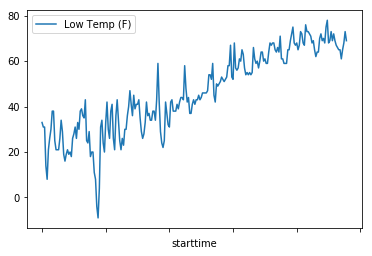

In [22]:
datatest[:24*10].plot(x='starttime', y='Low Temp (F)')

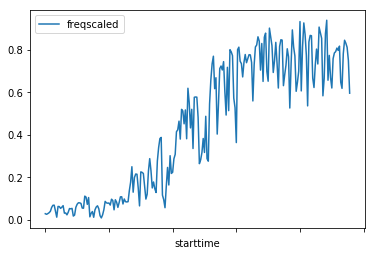

In [23]:
datatest[:24*10].plot(x='starttime', y='freqscaled')

In [24]:
dummy_fields = ['Year', 'Month', 'Day', 'Year']
for each in dummy_fields:
    dummies = pd.get_dummies(datatest[each], prefix=each, drop_first=False)
    datatest = pd.concat([datatest, dummies], axis=1)

fields_to_drop = ['Year', 'Month', 'Day','starttime', 'Events']                # remove freq? you need to drop starttime!
datatest = datatest.drop(fields_to_drop, axis=1)
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,241,0.029794,41,33,27,18,70,46,10,8,...,0,0,0,0,0,0,0,1,0,0
1,220,0.026950,40,31,21,17,61,40,10,10,...,0,0,0,0,0,0,0,1,0,0
2,245,0.030336,44,31,24,20,69,43,10,10,...,0,0,0,0,0,0,0,1,0,0
3,276,0.034534,36,14,25,2,72,50,10,2,...,0,0,0,0,0,0,0,1,0,0
4,325,0.041170,26,8,4,-5,58,27,10,10,...,0,0,0,0,0,0,0,1,0,0


In [25]:
dummies.head()

,Year_2016,Year_2017,Year_2018
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,241,0.029794,41,33,27,18,70,46,10,8,...,0,0,0,0,0,0,0,1,0,0
1,220,0.026950,40,31,21,17,61,40,10,10,...,0,0,0,0,0,0,0,1,0,0
2,245,0.030336,44,31,24,20,69,43,10,10,...,0,0,0,0,0,0,0,1,0,0
3,276,0.034534,36,14,25,2,72,50,10,2,...,0,0,0,0,0,0,0,1,0,0
4,325,0.041170,26,8,4,-5,58,27,10,10,...,0,0,0,0,0,0,0,1,0,0


In [27]:
quant_features = ['freq','High Temp (F)', 'Low Temp (F)', 'High Dew Point (F)', 'Low Dew Point (F)', 'High Humidity (%)', 'Low Humidity (%)', 'High Visibility (mi)', 'Low Visibility (mi)', 'High Wind (mph)']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = datatest[each].mean(), datatest[each].std()
    scaled_features[each] = [mean, std]
    datatest.loc[:, each] = (datatest[each] - mean)/std                  #put freq in quant_features!!!

In [28]:
scaled_features

{'freq': [3407.9512789281366, 2191.8839329837133],
 'High Temp (F)': [58.45676004872107, 18.682119891389597],
 'Low Temp (F)': [43.55176613885506, 17.05311107941028],
 'High Dew Point (F)': [45.17904993909866, 17.7525223099304],
 'Low Dew Point (F)': [32.286236297198535, 19.88496596187862],
 'High Humidity (%)': [83.67965895249695, 14.899122183362524],
 'Low Humidity (%)': [48.25700365408039, 18.353931333673618],
 'High Visibility (mi)': [9.986601705237515, 0.263310580682829],
 'Low Visibility (mi)': [6.956151035322777, 3.9286970218325075],
 'High Wind (mph)': [21.579780755176614, 6.45358893916986]}

In [29]:
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,-1.444854,0.029794,-0.934410,-0.618759,-1.024026,-0.718444,-0.918152,-0.122971,0.050884,0.265699,...,0,0,0,0,0,0,0,1,0,0
1,-1.454434,0.026950,-0.987937,-0.736040,-1.362006,-0.768733,-1.522214,-0.449877,0.050884,0.774773,...,0,0,0,0,0,0,0,1,0,0
2,-1.443029,0.030336,-0.773829,-0.736040,-1.193016,-0.617866,-0.985270,-0.286424,0.050884,0.774773,...,0,0,0,0,0,0,0,1,0,0
3,-1.428886,0.034534,-1.202046,-1.732925,-1.136686,-1.523072,-0.783916,0.094966,0.050884,-1.261525,...,0,0,0,0,0,0,0,1,0,0
4,-1.406530,0.041170,-1.737317,-2.084767,-2.319617,-1.875097,-1.723569,-1.158172,0.050884,0.774773,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# Save the last 21 days 
#test_data = datatest[-21*24:]               # from 21*24 = 504 to the end
#data_real = datatest[:-21*24]               #  from 0 to 504


test_data = datatest[400:]               
data_real = datatest[:400]

# Separate the data into features and targets
target_fields = ['freq']                                                                     # freq
features, targets = data_real.drop(target_fields, axis=1), data_real[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [31]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-10*24], targets[:-10*24]
val_features, val_targets = features[-10*24:], targets[-10*24:]

In [32]:
import numpy as np
from pdb import set_trace


class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5,
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate

        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = self.sigmoid

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)  # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer

        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error
        output_errors = (targets - final_outputs)  # Output layer error is the difference between desired target and actual output.

        # TODO: Backpropagated error
        hidden_errors = self.weights_hidden_to_output.T.dot(output_errors) * hidden_outputs * (1 - hidden_outputs)  # errors propagated to the hidden layer

        output_grad = self.lr * output_errors.dot(hidden_outputs.T)
        hidden_grad = self.lr * hidden_errors.dot(inputs.T)

        # TODO: Update the weights
        self.weights_hidden_to_output += output_grad  # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += hidden_grad   # update input-to-hidden weights with gradient descent step

    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T

        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)  # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)  # signals from hidden layer
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)   # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer

        return final_outputs

In [33]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [34]:
import sys

### Set the hyperparameters here ###
epochs = 3000                                      #3000
learning_rate = .001                                 #0.001
hidden_nodes = 10                             #10
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
                                                            # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['freq']):            #freq
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['freq'].values)              #freq
    val_loss = MSE(network.run(val_features), val_targets['freq'].values)                    #freq
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 99.9% ... Training loss: 0.011 ... Validation loss: 0.187

(-0.07426181376688556, 4)

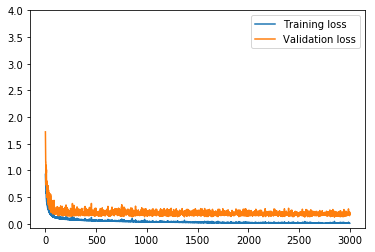

In [35]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=4)

(-0.07426181376688556, 0.1)

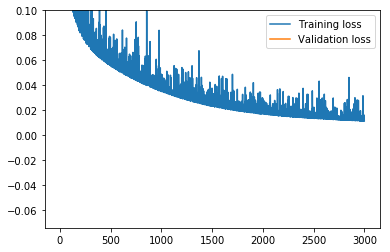

In [36]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=0.1)

In [37]:
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,-1.444854,0.029794,-0.934410,-0.618759,-1.024026,-0.718444,-0.918152,-0.122971,0.050884,0.265699,...,0,0,0,0,0,0,0,1,0,0
1,-1.454434,0.026950,-0.987937,-0.736040,-1.362006,-0.768733,-1.522214,-0.449877,0.050884,0.774773,...,0,0,0,0,0,0,0,1,0,0
2,-1.443029,0.030336,-0.773829,-0.736040,-1.193016,-0.617866,-0.985270,-0.286424,0.050884,0.774773,...,0,0,0,0,0,0,0,1,0,0
3,-1.428886,0.034534,-1.202046,-1.732925,-1.136686,-1.523072,-0.783916,0.094966,0.050884,-1.261525,...,0,0,0,0,0,0,0,1,0,0
4,-1.406530,0.041170,-1.737317,-2.084767,-2.319617,-1.875097,-1.723569,-1.158172,0.050884,0.774773,...,0,0,0,0,0,0,0,1,0,0


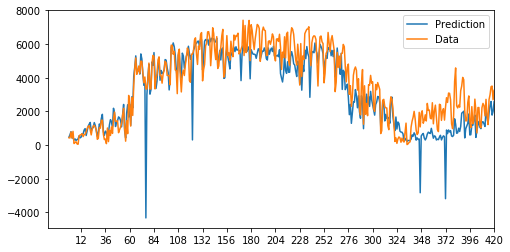

In [38]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['freq']                 #freq
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['freq']*std + mean).values, label='Data')       #freq
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(datatest.iloc[test_data.index]['freqscaled'])         #freqscaled
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
#_ = ax.set_xticklabels(dates[12::24], rotation=90)

In [39]:
pred = predictions

In [40]:
real = test_targets['freq']*std + mean
real = np.array(real)

In [41]:
realm = real.mean()
realm

3600.7434679334915

In [42]:
rpmae = real - pred
rpmae = np.absolute(rpmae)
rpmae = rpmae.mean()
rpmae

747.468428352833

In [43]:
correctness = 100 - 100*rpmae/realm
correctness

79.24127516971339

In [44]:
mse = real - pred
mse = mse**2
mse = mse.mean()
print(mse)
rmse = math.sqrt(mse)
print(rmse)
#rmse = math.sqrt(mean_squared_error(real, pred))
#rmse

1119487.0437575204
1058.0581476258856


# ---------------------------------------------------------------------------------------------------------------

# RNN Deep

# ---------------------------------------------------------------------------------------------------------------

In [929]:
number_of_test_data = 250
number_of_holdout_data = 150
number_of_training_data = len(data) - number_of_holdout_data - number_of_test_data
print ("total, train, test, holdout:", len(data), number_of_training_data, number_of_test_data, number_of_holdout_data)

total, train, test, holdout: 821 421 250 150


In [930]:
datatrain = data[:number_of_training_data]
datatest = data[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = data[-number_of_holdout_data:]

In [931]:
in_seq1 = array(datatrain['High Temp (F)'])
in_seq2 = array(datatrain['Low Temp (F)'])
in_seq3 = array(datatrain['High Dew Point (F)'])
in_seq4 = array(datatrain['Low Dew Point (F)'])
in_seq5 = array(datatrain['High Humidity (%)'])
in_seq6 = array(datatrain['Low Humidity (%)'])
in_seq7 = array(datatrain['High Visibility (mi)'])
in_seq8 = array(datatrain['Low Visibility (mi)'])
in_seq9 = array(datatrain['High Wind (mph)'])
in_seq10 = array(datatrain['Avg Wind (mph)'])
in_seq11 = array(datatrain['High Wind Gust (mph)'])
in_seq12 = array(datatrain['Snowfall (in)'])
in_seq13 = array(datatrain['Precip (in)'])
in_seq14 = array(datatrain['freqscaled'])
out_seq_train = array(datatrain['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

datatrain_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, out_seq_train))

In [932]:
in_seq1 = array(datatest['High Temp (F)'])
in_seq2 = array(datatest['Low Temp (F)'])
in_seq3 = array(datatest['High Dew Point (F)'])
in_seq4 = array(datatest['Low Dew Point (F)'])
in_seq5 = array(datatest['High Humidity (%)'])
in_seq6 = array(datatest['Low Humidity (%)'])
in_seq7 = array(datatest['High Visibility (mi)'])
in_seq8 = array(datatest['Low Visibility (mi)'])
in_seq9 = array(datatest['High Wind (mph)'])
in_seq10 = array(datatest['Avg Wind (mph)'])
in_seq11 = array(datatest['High Wind Gust (mph)'])
in_seq12 = array(datatest['Snowfall (in)'])
in_seq13 = array(datatest['Precip (in)'])
in_seq14 = array(datatest['freqscaled'])
out_seq_test = array(datatest['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))

datatest_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, out_seq_test))

In [933]:
in_seq1 = array(datahold['High Temp (F)'])
in_seq2 = array(datahold['Low Temp (F)'])
in_seq3 = array(datahold['High Dew Point (F)'])
in_seq4 = array(datahold['Low Dew Point (F)'])
in_seq5 = array(datahold['High Humidity (%)'])
in_seq6 = array(datahold['Low Humidity (%)'])
in_seq7 = array(datahold['High Visibility (mi)'])
in_seq8 = array(datahold['Low Visibility (mi)'])
in_seq9 = array(datahold['High Wind (mph)'])
in_seq10 = array(datahold['Avg Wind (mph)'])
in_seq11 = array(datahold['High Wind Gust (mph)'])
in_seq12 = array(datahold['Snowfall (in)'])
in_seq13 = array(datahold['Precip (in)'])
in_seq14 = array(datahold['freqscaled'])
out_seq_hold = array(datahold['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))

datahold_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, out_seq_hold))

In [934]:
n_features = datatrain_feed.shape[1]
n_input = 10
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

for i in range(len(generator_train)):
    x, y = generator_train[i]
    #print('%s => %s' % (x, y))

generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=n_input, batch_size=1)

for i in range(len(generator_test)):
    x, y = generator_test[i]
    #print('%s => %s' % (x, y))

generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=n_input, batch_size=1)

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    #print('%s => %s' % (x, y))

In [935]:
print("timesteps, features:", n_input, n_features)

timesteps, features: 10 15


In [936]:
model = Sequential()

#model.add(SimpleRNN(2, activation='tanh', input_shape=(n_input, n_features), return_sequences = True))
model.add(SimpleRNN(4, activation='relu', input_shape=(n_input, n_features), return_sequences = False))       #4 relu
model.add(Dense(1, activation='tanh'))                                                                        #1 tanh

adam = Adam(lr=0.001)                                                                         #ADAM!!!!!!!
model.compile(optimizer=adam, loss='mse')

In [937]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_49 (SimpleRNN)    (None, 4)                 80        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 5         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [938]:
import time

start = time.time()

score = model.fit_generator(generator_train, epochs=300, verbose=2, validation_data=generator_test)      #EPOCHS!!!


end = time.time()

Epoch 1/300
 - 3s - loss: 0.4180 - val_loss: 0.1886
Epoch 2/300
 - 0s - loss: 0.4177 - val_loss: 0.1882
Epoch 3/300
 - 0s - loss: 0.4174 - val_loss: 0.1878
Epoch 4/300
 - 0s - loss: 0.4170 - val_loss: 0.1874
Epoch 5/300
 - 0s - loss: 0.4165 - val_loss: 0.1871
Epoch 6/300
 - 0s - loss: 0.4159 - val_loss: 0.1868
Epoch 7/300
 - 0s - loss: 0.4152 - val_loss: 0.1866
Epoch 8/300
 - 0s - loss: 0.4146 - val_loss: 0.1864
Epoch 9/300
 - 0s - loss: 0.4140 - val_loss: 0.1863
Epoch 10/300
 - 0s - loss: 0.4137 - val_loss: 0.1861
Epoch 11/300
 - 0s - loss: 0.4134 - val_loss: 0.1859
Epoch 12/300
 - 0s - loss: 0.4130 - val_loss: 0.1857
Epoch 13/300
 - 0s - loss: 0.4125 - val_loss: 0.1855
Epoch 14/300
 - 0s - loss: 0.4119 - val_loss: 0.1853
Epoch 15/300
 - 0s - loss: 0.4112 - val_loss: 0.1851
Epoch 16/300
 - 0s - loss: 0.4103 - val_loss: 0.1851
Epoch 17/300
 - 0s - loss: 0.4095 - val_loss: 0.1850
Epoch 18/300
 - 0s - loss: 0.4085 - val_loss: 0.1849
Epoch 19/300
 - 0s - loss: 0.4076 - val_loss: 0.1847
Ep

Epoch 155/300
 - 0s - loss: 0.0795 - val_loss: 0.0747
Epoch 156/300
 - 1s - loss: 0.0779 - val_loss: 0.0738
Epoch 157/300
 - 0s - loss: 0.0763 - val_loss: 0.0732
Epoch 158/300
 - 0s - loss: 0.0747 - val_loss: 0.0728
Epoch 159/300
 - 0s - loss: 0.0731 - val_loss: 0.0726
Epoch 160/300
 - 0s - loss: 0.0714 - val_loss: 0.0725
Epoch 161/300
 - 0s - loss: 0.0696 - val_loss: 0.0726
Epoch 162/300
 - 0s - loss: 0.0680 - val_loss: 0.0725
Epoch 163/300
 - 0s - loss: 0.0664 - val_loss: 0.0722
Epoch 164/300
 - 0s - loss: 0.0649 - val_loss: 0.0717
Epoch 165/300
 - 0s - loss: 0.0634 - val_loss: 0.0710
Epoch 166/300
 - 0s - loss: 0.0618 - val_loss: 0.0700
Epoch 167/300
 - 0s - loss: 0.0602 - val_loss: 0.0689
Epoch 168/300
 - 0s - loss: 0.0586 - val_loss: 0.0678
Epoch 169/300
 - 0s - loss: 0.0571 - val_loss: 0.0664
Epoch 170/300
 - 0s - loss: 0.0558 - val_loss: 0.0650
Epoch 171/300
 - 0s - loss: 0.0545 - val_loss: 0.0636
Epoch 172/300
 - 1s - loss: 0.0531 - val_loss: 0.0624
Epoch 173/300
 - 0s - loss: 

In [939]:
elapsed = end - start
elapsed

109.16037917137146

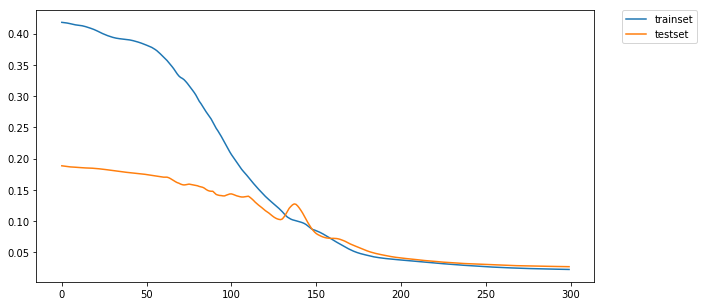

In [940]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [941]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [942]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']


In [943]:
pd.options.display.max_rows=1000
df_result

,Actual,Prediction,Diff
0,991.0,955.973633,-3.534447
1,1465.0,1339.488525,-8.567336
2,1469.0,3697.859131,151.726285
3,636.0,2495.655762,292.398705
4,316.0,1565.575562,395.435304
5,351.0,955.973633,172.357160
6,77.0,955.973633,1141.524198
7,1005.0,955.973633,-4.878245
8,197.0,955.973633,385.265803
9,876.0,955.973633,9.129410


In [944]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  4720.6375
mae: 1001.7632720947265
mae/mean ratio:  21.22093196299709 %
correctness:  78.77906803700292 %


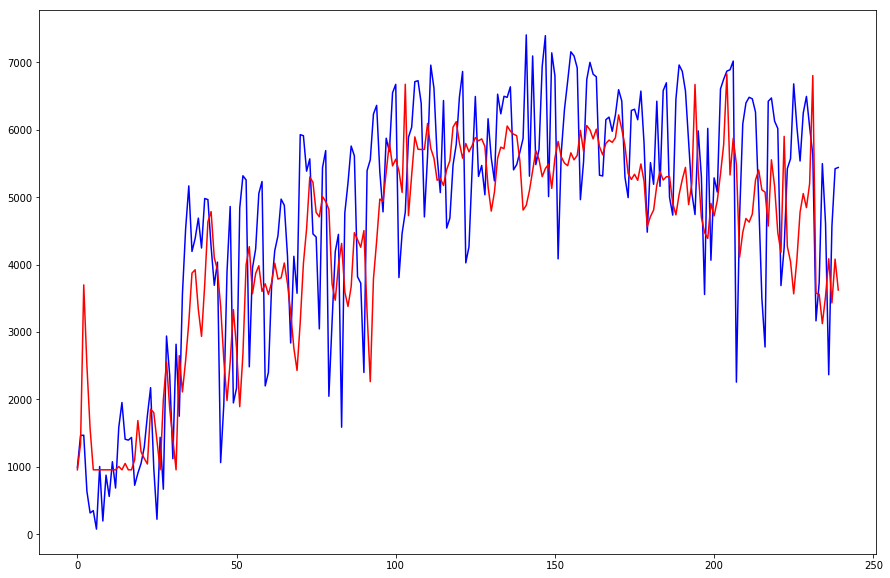

In [945]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

In [946]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [947]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']
df_result

,Actual,Prediction,Diff
0,4138.0,955.973633,-76.897689
1,4482.0,1942.044067,-56.670146
2,4629.0,1589.989990,-65.651545
3,4432.0,2249.849365,-49.236251
4,3259.0,1734.387085,-46.781618
5,3928.0,1617.643066,-58.817641
6,2199.0,1719.032104,-21.826644
7,1786.0,3063.593506,71.533791
8,3662.0,2816.479004,-23.089050
9,4477.0,1896.143921,-57.646998


In [948]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_result)

     Actual   Prediction         Diff
0    4138.0   955.973633   -76.897689
1    4482.0  1942.044067   -56.670146
2    4629.0  1589.989990   -65.651545
3    4432.0  2249.849365   -49.236251
4    3259.0  1734.387085   -46.781618
5    3928.0  1617.643066   -58.817641
6    2199.0  1719.032104   -21.826644
7    1786.0  3063.593506    71.533791
8    3662.0  2816.479004   -23.089050
9    4477.0  1896.143921   -57.646998
10   1231.0  2294.377686    86.383240
11   1054.0  2200.736572   108.798536
12   1818.0  1321.878662   -27.289403
13   2463.0  1734.119507   -29.593199
14   1738.0  2605.422607    49.909241
15   3577.0  1942.931152   -45.682663
16   3553.0  1106.272095   -68.863718
17   4130.0  1747.556030   -57.686295
18   3665.0  2834.108643   -22.670978
19   3748.0  2272.871094   -39.357762
20   2172.0  3168.568604    45.882532
21   1998.0  2041.866821     2.195537
22   3589.0  1926.453857   -46.323381
23   3281.0  1723.476562   -47.470998
24   3703.0  1068.745117   -71.138398
25   3506.0 

In [949]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  2013.892857142857
mae: 1010.5767011369977
mae/mean ratio:  50.18026145495742 %
correctness:  49.81973854504258 %


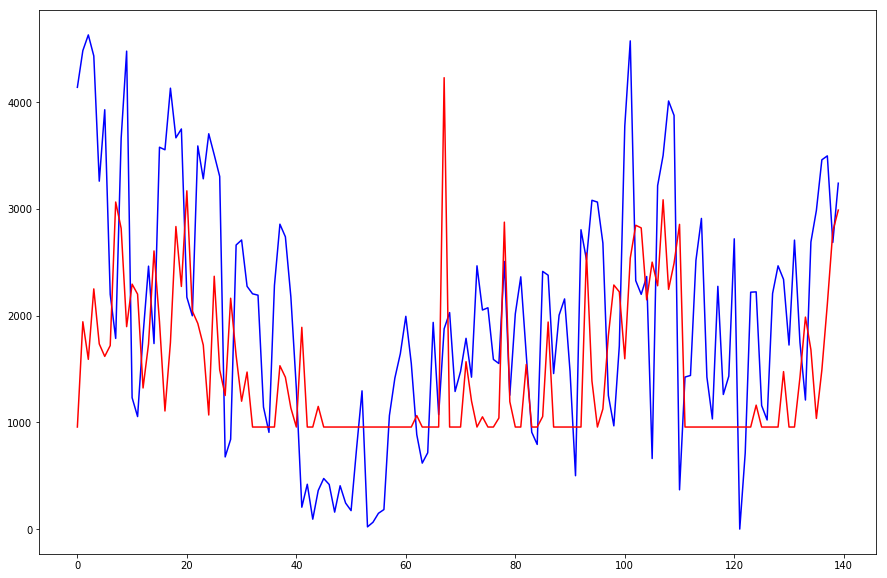

In [950]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# ARIMA test - BENCHMARK

# --------------------------------------------------------------------------------------------------------------- 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 
%matplotlib inline

In [46]:
# fix random seed for reproducibility
np.random.seed(10)
#see current working directory
cwd = os.getcwd()
#change it to the current path
os.chdir("C:/Users/Davor/")
# load the dataset
path = './Desktop/Notebooks/data.csv'
def getTansformedData(path):
    frame = pd.read_csv(path,engine='python',skiprows=0)
    return frame

In [47]:
data=getTansformedData(path)  
def num_missing(x):
    return sum(x.isnull())
data.apply(num_missing, axis=0)

Unnamed: 0              0
starttime               0
freq                    0
freqscaled              0
Year                    0
Month                   0
Day                     0
High Temp (F)           0
Low Temp (F)            0
High Dew Point (F)      0
Low Dew Point (F)       0
High Humidity (%)       0
Low Humidity (%)        0
High Visibility (mi)    0
Low Visibility (mi)     0
High Wind (mph)         0
Avg Wind (mph)          0
High Wind Gust (mph)    0
Snowfall (in)           0
Precip (in)             0
Events                  1
dtype: int64

In [48]:
del data['Unnamed: 0']
data.head()

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2016-01-01,241,0.029794,2016,1,1,41,33,27,18,70,46,10,8,23,13,32,0.0,0.0,None
1,2016-01-02,220,0.026950,2016,1,2,40,31,21,17,61,40,10,10,22,13,28,0.0,0.0,None
2,2016-01-03,245,0.030336,2016,1,3,44,31,24,20,69,43,10,10,21,12,28,0.0,0.0,None
3,2016-01-04,276,0.034534,2016,1,4,36,14,25,2,72,50,10,2,21,12,28,0.0,0.0,Snow
4,2016-01-05,325,0.041170,2016,1,5,26,8,4,-5,58,27,10,10,18,10,23,0.0,0.0,None


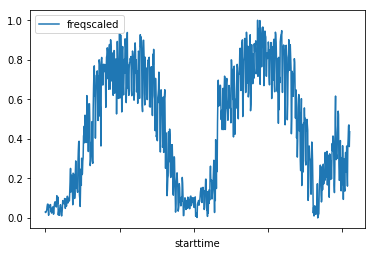

<Figure size 432x288 with 0 Axes>

In [49]:
data.plot(x='starttime',y='freqscaled')
plt.show()
plt.savefig('C:/Users/Davor/Desktop/ARIMA_DEMO.png')

In [50]:
def Change_Dtypes(data):
    data['Date']=pd.to_datetime(data['starttime'],errors='coerce')
    return data
Change_Dtypes(data)

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),...,Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,Date
0,2016-01-01,241,0.029794,2016,1,1,41,33,27,18,...,46,10,8,23,13,32,0.00,0.00,None,2016-01-01
1,2016-01-02,220,0.026950,2016,1,2,40,31,21,17,...,40,10,10,22,13,28,0.00,0.00,None,2016-01-02
2,2016-01-03,245,0.030336,2016,1,3,44,31,24,20,...,43,10,10,21,12,28,0.00,0.00,None,2016-01-03
3,2016-01-04,276,0.034534,2016,1,4,36,14,25,2,...,50,10,2,21,12,28,0.00,0.00,Snow,2016-01-04
4,2016-01-05,325,0.041170,2016,1,5,26,8,4,-5,...,27,10,10,18,10,23,0.00,0.00,None,2016-01-05
5,2016-01-06,459,0.059317,2016,1,6,45,21,10,-5,...,12,10,10,15,10,22,0.00,0.00,None,2016-01-06
6,2016-01-07,533,0.069339,2016,1,7,43,26,24,6,...,22,10,10,14,6,18,0.00,0.00,None,2016-01-07
7,2016-01-08,537,0.069881,2016,1,8,42,30,34,24,...,70,10,10,18,11,23,0.00,0.00,None,2016-01-08
8,2016-01-09,327,0.041441,2016,1,9,41,38,38,32,...,76,10,2,16,6,18,0.00,0.01,Rain,2016-01-09
9,2016-01-10,121,0.013543,2016,1,10,58,38,57,37,...,83,10,0,30,15,39,0.00,1.38,Rain,2016-01-10


In [51]:
def test_stationarity(timeseries):
#     #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)

#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(12, 8))
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(data.freqscaled)

Results of Dickey-Fuller Test
Test Statistic                  -1.818492
p-value                          0.371320
#Lags Used                      20.000000
Number of Observations Used    800.000000
Critical Value (1%)             -3.438551
Critical Value (5%)             -2.865160
Critical Value (10%)            -2.568697
dtype: float64


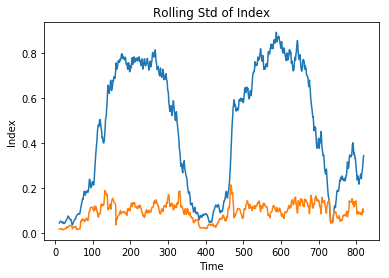

In [52]:
def Plot_rolling_stats(value):
    #test_stationarity(data.value)
    var_index = value.rolling(12).std()
    mean_index = value.rolling(12).mean()
    mean_index.plot()
    plt.title("Rolling Mean of Index")
    plt.xlabel("Time")
    plt.ylabel("Index")
    var_index.plot()
    plt.title("Rolling Std of Index")
    plt.xlabel("Time")
    plt.ylabel("Index")
Plot_rolling_stats(data.freqscaled)

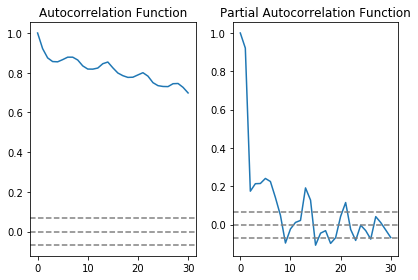

In [53]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=30)
    lag_pacf = pacf(value, nlags=30, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
Plot_ACF_PACF(data.freqscaled)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

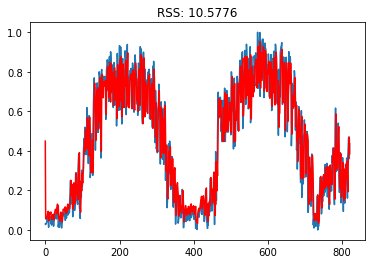

In [54]:
def build_ARIMA_model(value):
    model = ARIMA(np.array(value), order=(2,0,0))
    results_AR = model.fit(disp=-1)
    plt.plot(value)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-value)**2))
    return results_AR.fittedvalues,value
pred,true=build_ARIMA_model(data.freqscaled)

In [55]:
def Find_RMSE_MAE(x,x1,i):
        if i==1:
            return math.sqrt(mean_squared_error(x, x1))
        else:
            return mean_absolute_error(x, x1)
# calculate root mean squared error
trerr= Find_RMSE_MAE(true,pred,1)
print('Train Score: %.2f RMSE' %(trerr))
# calculate mean absloute error
meanerrtr = Find_RMSE_MAE(true,pred,0)
print ('Train Score: %.2f MAE' %(meanerrtr))

Train Score: 0.11 RMSE
Train Score: 0.09 MAE


In [56]:
razlika = true -pred
razlikabs = np.absolute(razlika)
razm = razlikabs.mean()

xmean = true.mean()



crrct = 1 - (razm/xmean)

crrct

0.8133753670688718

# ---------------------------------------------------------------------------------------------------------------

# RNN LSTM

# --------------------------------------------------------------------------------------------------------------- 

In [73]:
data = pd.read_csv('C:/Users/Davor/Desktop/Notebooks/data.csv')

del data['Unnamed: 0']

data = data['freqscaled']

data.values.astype("float32")

data = data.values.reshape(-1,1)     #THIS IS TO BE USED TO GET CORRECT RESHAPE

data[0:5]

array([[0.02979415],
       [0.02695016],
       [0.03033586],
       [0.03453413],
       [0.0411701 ]])

In [74]:
# Multilayer Perceptron to Predict Bike Frequencies (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
 
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)                                        #7
# load the dataset
dataset = data
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.6)                                                          #TRAIN SIZE 0.67
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3                                                                    #LOOK_BACK = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(24, input_dim=look_back, activation='relu'))                 #12 relu
model.add(Dense(12, activation='tanh'))                                       #8 relu
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=2, verbose=2)             # EPOCHS=400

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Epoch 1/1000
 - 0s - loss: 0.0409
Epoch 2/1000
 - 0s - loss: 0.0118
Epoch 3/1000
 - 0s - loss: 0.0113
Epoch 4/1000
 - 0s - loss: 0.0108
Epoch 5/1000
 - 0s - loss: 0.0106
Epoch 6/1000
 - 0s - loss: 0.0104
Epoch 7/1000
 - 0s - loss: 0.0107
Epoch 8/1000
 - 0s - loss: 0.0107
Epoch 9/1000
 - 0s - loss: 0.0105
Epoch 10/1000
 - 0s - loss: 0.0106
Epoch 11/1000
 - 0s - loss: 0.0102
Epoch 12/1000
 - 0s - loss: 0.0108
Epoch 13/1000
 - 0s - loss: 0.0105
Epoch 14/1000
 - 0s - loss: 0.0106
Epoch 15/1000
 - 0s - loss: 0.0102
Epoch 16/1000
 - 0s - loss: 0.0109
Epoch 17/1000
 - 0s - loss: 0.0103
Epoch 18/1000
 - 0s - loss: 0.0106
Epoch 19/1000
 - 0s - loss: 0.0104
Epoch 20/1000
 - 0s - loss: 0.0104
Epoch 21/1000
 - 0s - loss: 0.0105
Epoch 22/1000
 - 0s - loss: 0.0103
Epoch 23/1000
 - 0s - loss: 0.0103
Epoch 24/1000
 - 0s - loss: 0.0102
Epoch 25/1000
 - 0s - loss: 0.0104
Epoch 26/1000
 - 0s - loss: 0.0101
Epoch 27/1000
 - 0s - loss: 0.0101
Epoch 28/1000
 - 0s - loss: 0.0098
Epoch 29/1000
 - 0s - loss: 0

Epoch 232/1000
 - 0s - loss: 0.0089
Epoch 233/1000
 - 0s - loss: 0.0090
Epoch 234/1000
 - 0s - loss: 0.0091
Epoch 235/1000
 - 0s - loss: 0.0089
Epoch 236/1000
 - 0s - loss: 0.0090
Epoch 237/1000
 - 0s - loss: 0.0092
Epoch 238/1000
 - 0s - loss: 0.0093
Epoch 239/1000
 - 0s - loss: 0.0091
Epoch 240/1000
 - 0s - loss: 0.0089
Epoch 241/1000
 - 0s - loss: 0.0089
Epoch 242/1000
 - 0s - loss: 0.0090
Epoch 243/1000
 - 0s - loss: 0.0091
Epoch 244/1000
 - 0s - loss: 0.0091
Epoch 245/1000
 - 0s - loss: 0.0089
Epoch 246/1000
 - 0s - loss: 0.0093
Epoch 247/1000
 - 0s - loss: 0.0090
Epoch 248/1000
 - 0s - loss: 0.0090
Epoch 249/1000
 - 0s - loss: 0.0090
Epoch 250/1000
 - 0s - loss: 0.0090
Epoch 251/1000
 - 0s - loss: 0.0095
Epoch 252/1000
 - 0s - loss: 0.0091
Epoch 253/1000
 - 0s - loss: 0.0089
Epoch 254/1000
 - 0s - loss: 0.0090
Epoch 255/1000
 - 0s - loss: 0.0089
Epoch 256/1000
 - 0s - loss: 0.0089
Epoch 257/1000
 - 0s - loss: 0.0090
Epoch 258/1000
 - 0s - loss: 0.0091
Epoch 259/1000
 - 0s - loss:

Epoch 460/1000
 - 0s - loss: 0.0088
Epoch 461/1000
 - 0s - loss: 0.0091
Epoch 462/1000
 - 0s - loss: 0.0086
Epoch 463/1000
 - 0s - loss: 0.0088
Epoch 464/1000
 - 0s - loss: 0.0089
Epoch 465/1000
 - 0s - loss: 0.0087
Epoch 466/1000
 - 0s - loss: 0.0090
Epoch 467/1000
 - 0s - loss: 0.0089
Epoch 468/1000
 - 0s - loss: 0.0086
Epoch 469/1000
 - 0s - loss: 0.0090
Epoch 470/1000
 - 0s - loss: 0.0091
Epoch 471/1000
 - 0s - loss: 0.0089
Epoch 472/1000
 - 0s - loss: 0.0088
Epoch 473/1000
 - 0s - loss: 0.0090
Epoch 474/1000
 - 0s - loss: 0.0087
Epoch 475/1000
 - 0s - loss: 0.0087
Epoch 476/1000
 - 0s - loss: 0.0090
Epoch 477/1000
 - 0s - loss: 0.0087
Epoch 478/1000
 - 0s - loss: 0.0088
Epoch 479/1000
 - 0s - loss: 0.0087
Epoch 480/1000
 - 0s - loss: 0.0089
Epoch 481/1000
 - 0s - loss: 0.0089
Epoch 482/1000
 - 0s - loss: 0.0090
Epoch 483/1000
 - 0s - loss: 0.0088
Epoch 484/1000
 - 0s - loss: 0.0089
Epoch 485/1000
 - 0s - loss: 0.0088
Epoch 486/1000
 - 0s - loss: 0.0090
Epoch 487/1000
 - 0s - loss:

Epoch 688/1000
 - 0s - loss: 0.0087
Epoch 689/1000
 - 0s - loss: 0.0088
Epoch 690/1000
 - 0s - loss: 0.0089
Epoch 691/1000
 - 0s - loss: 0.0087
Epoch 692/1000
 - 0s - loss: 0.0087
Epoch 693/1000
 - 0s - loss: 0.0088
Epoch 694/1000
 - 0s - loss: 0.0088
Epoch 695/1000
 - 0s - loss: 0.0087
Epoch 696/1000
 - 0s - loss: 0.0090
Epoch 697/1000
 - 0s - loss: 0.0088
Epoch 698/1000
 - 0s - loss: 0.0087
Epoch 699/1000
 - 0s - loss: 0.0086
Epoch 700/1000
 - 0s - loss: 0.0087
Epoch 701/1000
 - 0s - loss: 0.0087
Epoch 702/1000
 - 0s - loss: 0.0086
Epoch 703/1000
 - 0s - loss: 0.0089
Epoch 704/1000
 - 0s - loss: 0.0086
Epoch 705/1000
 - 0s - loss: 0.0088
Epoch 706/1000
 - 0s - loss: 0.0088
Epoch 707/1000
 - 0s - loss: 0.0087
Epoch 708/1000
 - 0s - loss: 0.0087
Epoch 709/1000
 - 0s - loss: 0.0086
Epoch 710/1000
 - 0s - loss: 0.0087
Epoch 711/1000
 - 0s - loss: 0.0087
Epoch 712/1000
 - 0s - loss: 0.0087
Epoch 713/1000
 - 0s - loss: 0.0088
Epoch 714/1000
 - 0s - loss: 0.0087
Epoch 715/1000
 - 0s - loss:

Epoch 916/1000
 - 0s - loss: 0.0086
Epoch 917/1000
 - 0s - loss: 0.0087
Epoch 918/1000
 - 0s - loss: 0.0089
Epoch 919/1000
 - 0s - loss: 0.0087
Epoch 920/1000
 - 0s - loss: 0.0087
Epoch 921/1000
 - 0s - loss: 0.0087
Epoch 922/1000
 - 0s - loss: 0.0087
Epoch 923/1000
 - 0s - loss: 0.0087
Epoch 924/1000
 - 0s - loss: 0.0087
Epoch 925/1000
 - 0s - loss: 0.0085
Epoch 926/1000
 - 0s - loss: 0.0086
Epoch 927/1000
 - 0s - loss: 0.0089
Epoch 928/1000
 - 0s - loss: 0.0088
Epoch 929/1000
 - 0s - loss: 0.0087
Epoch 930/1000
 - 0s - loss: 0.0088
Epoch 931/1000
 - 0s - loss: 0.0086
Epoch 932/1000
 - 0s - loss: 0.0087
Epoch 933/1000
 - 0s - loss: 0.0088
Epoch 934/1000
 - 0s - loss: 0.0087
Epoch 935/1000
 - 0s - loss: 0.0083
Epoch 936/1000
 - 0s - loss: 0.0087
Epoch 937/1000
 - 0s - loss: 0.0087
Epoch 938/1000
 - 0s - loss: 0.0086
Epoch 939/1000
 - 0s - loss: 0.0087
Epoch 940/1000
 - 0s - loss: 0.0085
Epoch 941/1000
 - 0s - loss: 0.0085
Epoch 942/1000
 - 0s - loss: 0.0088
Epoch 943/1000
 - 0s - loss:

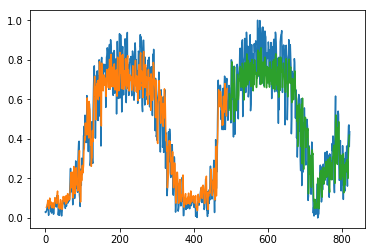

In [75]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [76]:
z = testX - testPredict

z = np.absolute(z)

zm = z.mean()

xm = testX.mean()

rez = 1 - (zm/xm)

rez

0.8306221812963486

# ---------------------------------------------------------------------------------------------------------------

### Convolutional Neural Network

# ---------------------------------------------------------------------------------------------------------------

In [1027]:
labels =[{'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [1028]:
train = [{'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [1029]:
labels = pd.DataFrame(labels)
labels = labels[['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]

In [1030]:
train = pd.DataFrame(train)
train = train[['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]

In [1031]:
test =  [{'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 1, '1x2': 1, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 1, '2x2': 1, '2x3': 1, '2x4': 1, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 1, '3x3': 1, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 1, '4x3': 1, '4x4': 1, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 1, '5x4': 1, '5x5': 1, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [1061]:
truth = [{'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 5, '1x1': 1, '1x2': 1, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 1, '2x2': 1, '2x3': 1, '2x4': 1, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 1, '3x3': 1, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 1, '4x3': 1, '4x4': 1, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 1, '5x4': 1, '5x5': 1, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [1063]:
test = pd.DataFrame(test)
test = test[['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]

truth = pd.DataFrame(truth)
truth = truth[['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]

In [1033]:
num_training = len(train.values)
num_testing = len(test.values)

print("Amount of training data:", num_training, "pairs of images and labels.")
print("Amount of testing data:", num_testing, "images.")

Amount of training data: 50 pairs of images and labels.
Amount of testing data: 13 images.


In [1034]:
# Here we are defining the x & y variables for training and testing

y_train = np.array(train.pop("label").values) # array containing correct labels | Shape -> (42000,)
x_train = np.array(train.values) # array of images for training | Shape -> (42000, 784)
x_test = np.array(test.values) # array of images for testing | Shape -> (28000, 784)

In [1035]:
x_train = x_train.reshape(num_training, 9, 9) # resulting shape => (42000, 28, 28)
x_test = x_test.reshape(num_testing, 9, 9) # resulting shape => (28000, 28, 28)

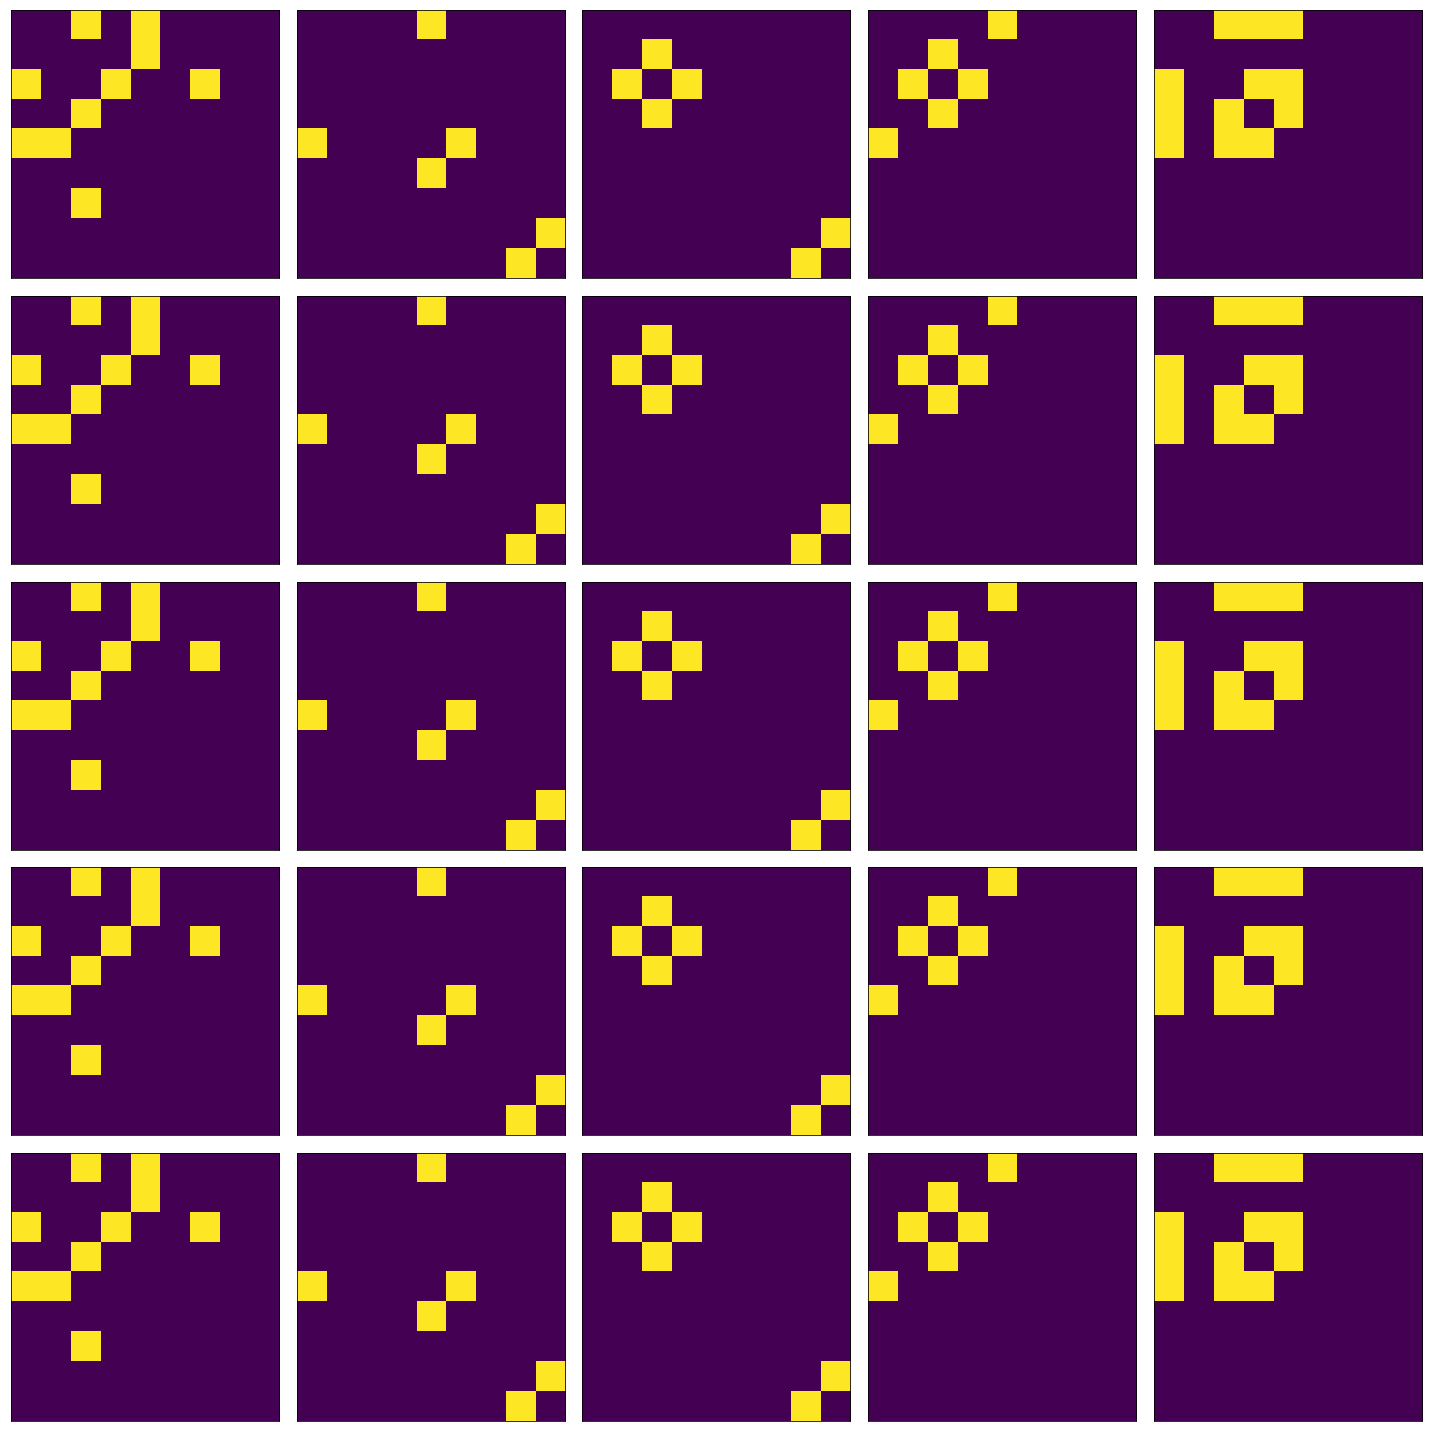

In [1036]:
# Now lets take a look at some of our training images!

plt.figure(figsize=(20,20))
for i in range(25):                           # change range to be number of training images
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

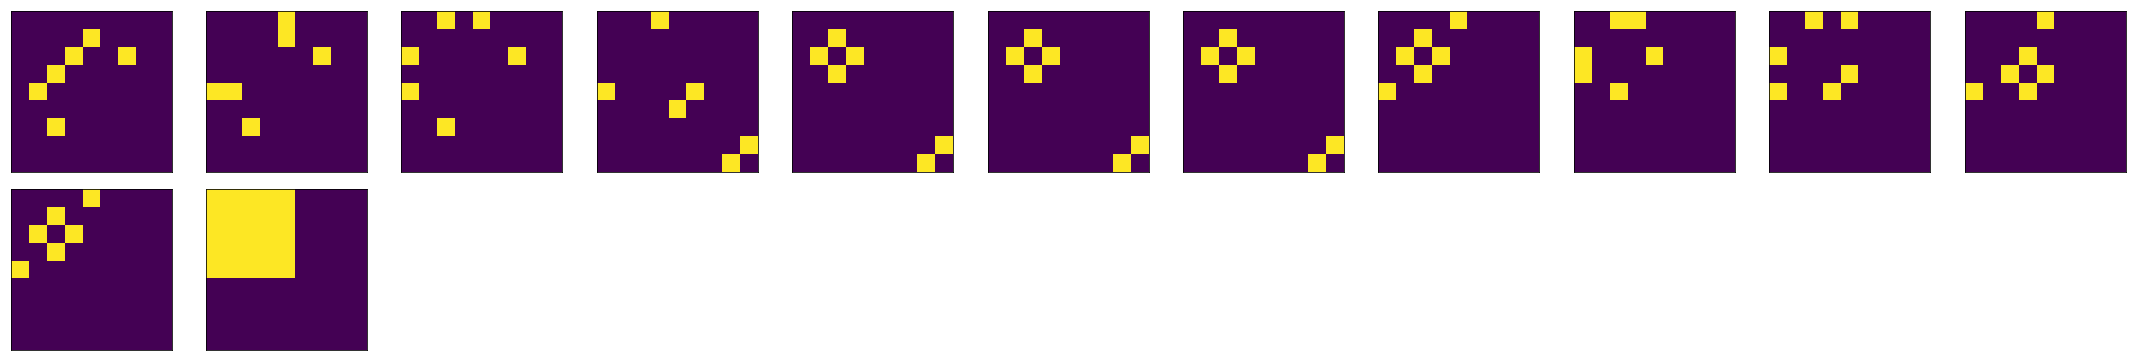

In [1037]:
# Now lets take a look at some of our training images!

plt.figure(figsize=(30,15))
for i in range(13):                          # change RANGE to be number of test images
    plt.subplot(6,11,i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [1038]:
# First of, lets standardize our features by removing the mean and scaling to unit variance
rawx = train.values[:1000] # If you don't have enough memory to run the tsne on all the data here you'll limit it
from sklearn.preprocessing import StandardScaler
xscaled = StandardScaler().fit_transform(rawx)

from sklearn.manifold import TSNE
tsne = TSNE()
vis = tsne.fit_transform(xscaled) 
vis = [{'X': vis[i][0], 'Y': vis[i][1], 'K': y_train[i]} for i in range(len(vis))] # transform to dict for plotting

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1039]:
# category label name
my_labels = np.array([
    'A',
    'B',
    'C',
    'D',
    'E'])

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


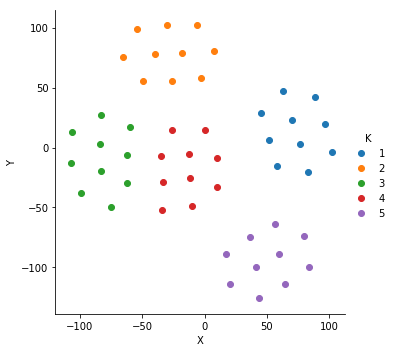

In [1040]:
sns.FacetGrid(pd.DataFrame.from_dict(vis), hue="K", size=5) \
   .map(plt.scatter, "X", "Y") \
   .add_legend()

In [1041]:
pca = PCA(n_components=5)
pca_ani = pca.fit_transform(xscaled)

xpca = pca_ani[:, 0]
ypca = pca_ani[:, 1]
vispca = [{'X': xpca[i], 'Y': ypca[i], 'K': y_train[i]} for i in range(len(xpca))]

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


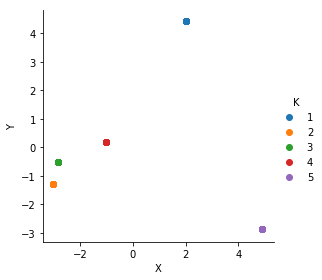

In [1042]:
sns.FacetGrid(pd.DataFrame.from_dict(vispca), hue="K", size=4) \
   .map(plt.scatter, "X", "Y") \
   .add_legend()

In [1043]:
# normalize X datapoints. We want them to be between 0 and 1
x_train = x_train # Perform an elementwise division by 255.0 (the maximum possible value for each pixel)
x_test = x_test

In [1045]:
y_train_hot = LabelBinarizer().fit_transform(y_train)

In [1046]:
model.compile(optimizer=Adam(lr=0.001),                            #0.001
              loss="categorical_crossentropy",
              metrics=['accuracy'],
              decay=1)

In [1049]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(6, 5, 5, input_shape=(9, 9, 1), bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Dropout Layer 1
model.add(Dropout(p=0.12))

# Convolutional Layer 2
model.add(Conv2D(16, 5, 5, bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Convolutional Layer 3
model.add(Conv2D(35, 5, 5, bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Flatten convolutional result so we can feed data to fully connected layers
model.add(Flatten())

# Fully connected 1
model.add(Dense(120, bias=True))
model.add(Activation('relu'))

# Dropout Layer 2
model.add(Dropout(p=0.5))

# Fully connected 1
model.add(Dense(84, bias=True))
model.add(Activation('relu'))

model.add(Dense(5, bias=True))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=0.001),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(9, 9, 1), padding="same", use_bias=True)`
  """
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  import sys
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.12)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", use_bias=True)`
  
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling

In [1050]:
# Add extra dimension: Keras' is expecting an input of shape (num_x_train, 28, 28, 1) 
# but for the moment the shape of x_train is (num_x_train, 28, 28). We can easily add this extra 
# dimension using np.expand_dims(axis=4).
x_train = np.expand_dims(x_train, axis=4)

# We'll also take advantage of the occassion to do the same modification to x_test
x_test = np.expand_dims(x_test, axis=4)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [1051]:
# Now: Train the model! Remember we one-hot encoded y_train so we shold use y_train_hot as our labels.

# Note: verbose=2 gives us one log line per epoch.
training_hist = model.fit(x_train, y_train_hot, nb_epoch=60, batch_size=64, verbose=4, validation_split=0.23)    #epochs!!!!!!!!!!!

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 38 samples, validate on 12 samples
Epoch 1/60
Epoch 2/60
Epoch 3/60
Epoch 4/60
Epoch 5/60
Epoch 6/60
Epoch 7/60
Epoch 8/60
Epoch 9/60
Epoch 10/60
Epoch 11/60
Epoch 12/60
Epoch 13/60
Epoch 14/60
Epoch 15/60
Epoch 16/60
Epoch 17/60
Epoch 18/60
Epoch 19/60
Epoch 20/60
Epoch 21/60
Epoch 22/60
Epoch 23/60
Epoch 24/60
Epoch 25/60
Epoch 26/60
Epoch 27/60
Epoch 28/60
Epoch 29/60
Epoch 30/60
Epoch 31/60
Epoch 32/60
Epoch 33/60
Epoch 34/60
Epoch 35/60
Epoch 36/60
Epoch 37/60
Epoch 38/60
Epoch 39/60
Epoch 40/60
Epoch 41/60
Epoch 42/60
Epoch 43/60
Epoch 44/60
Epoch 45/60
Epoch 46/60
Epoch 47/60
Epoch 48/60
Epoch 49/60
Epoch 50/60
Epoch 51/60
Epoch 52/60
Epoch 53/60
Epoch 54/60
Epoch 55/60
Epoch 56/60
Epoch 57/60
Epoch 58/60
Epoch 59/60
Epoch 60/60


In [1052]:
hdf = pd.DataFrame.from_dict(training_hist.history)
hdf['epochs'] = list(range(60))                               # 16 is the number of epochs we used for training!!!

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


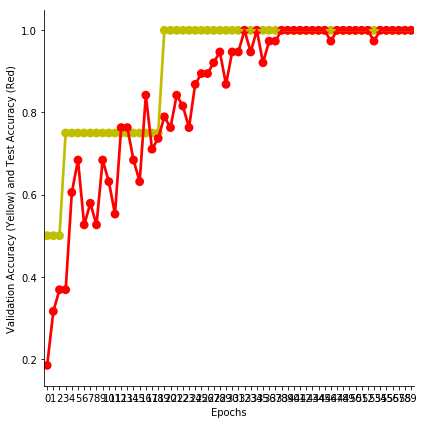

In [1053]:
sns.FacetGrid(hdf, size=6) \
   .map(sns.pointplot, "epochs", "val_acc", color="y") \
   .map(sns.pointplot, "epochs", "acc", color="r") \
   .set(xlabel='Epochs', ylabel='Validation Accuracy (Yellow) and Test Accuracy (Red)')

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


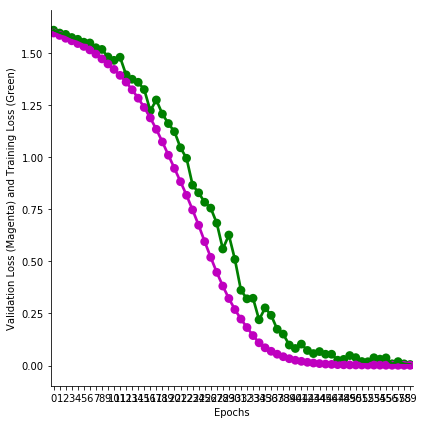

In [1054]:
sns.FacetGrid(hdf, size=6) \
   .map(sns.pointplot, "epochs", "loss", color="g") \
   .map(sns.pointplot, "epochs", "val_loss", color="m") \
   .set(xlabel='Epochs', ylabel='Validation Loss (Magenta) and Training Loss (Green)') 

In [1057]:
pred = model.predict_classes(x_test, verbose=4) # Shape -> (28000,)

sub_df = pd.DataFrame()
sub_df["ImageId"] = list(range(1, num_testing + 1))
sub_df["Label"] = pred+1                                      # added PLUS 1 just so that it doesn't count from ZERO

# sub_df.to_csv("mnist_predictions.csv", header=True, index=False)

In [1058]:
# Display head and lenght of our predictions:
print("Amount of test points:", num_testing)
print("Amount of predictions:", len(pred))

sub_df

Amount of test points: 13
Amount of predictions: 13


,ImageId,Label
0,1,1
1,2,1
2,3,1
3,4,2
4,5,3
5,6,3
6,7,3
7,8,4
8,9,5
9,10,5


In [1059]:
len(pred)

13

In [1064]:
truth.label

0     1
1     1
2     1
3     2
4     3
5     3
6     3
7     4
8     5
9     5
10    5
11    4
12    5
Name: label, dtype: int64

In [1065]:
sub_df.Label

0     1
1     1
2     1
3     2
4     3
5     3
6     3
7     4
8     5
9     5
10    5
11    4
12    5
Name: Label, dtype: int64

In [1066]:
same = truth['label'] == sub_df['Label']
same

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
dtype: bool

In [1067]:
s = sum(same)
s

13

In [1068]:
precision = (s/len(pred))*100
print("precision is", precision, "%")

precision is 100.0 %


# ---------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------